## **Performing Data Cleaning and EDA on Titanic Dataset**

### **Importing the libraries and dataset**

In [195]:
!pip install seaborn

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [197]:
df = pd.read_csv("Titanic-Dataset.csv")

In [198]:
df.shape

(891, 12)

In [199]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### **Column information**

In [200]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Cleaning the Dataset**
**1. Finding Missing values**

In [202]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

** 2. Droping Cabing Column**

In [203]:
df.drop(columns=['Cabin'], inplace = True)

**3. Inputting missing values by mean for Age column**

In [204]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

**3. Inputting missing values with mostly appeared value i.e. 'S' for Embarked column**

In [205]:
df['Embarked'].value_counts()
df['Embarked'].fillna('S', inplace = True)

**3. Changing Datatype for columns 'Survived', 'Pclass', 'Sex', 'Age' and 'Embarked'**

In [206]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


**Five point summary**

In [208]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


## **Performing EDA (Exploratory Data Analysis)**

###**Survival with Pclass**

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


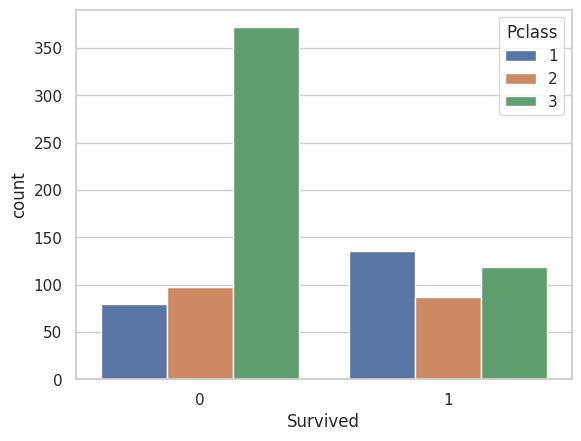

In [209]:
sns.countplot(x=df['Survived'], hue = df['Pclass'])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis=1)

###**Survival with Sex**

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


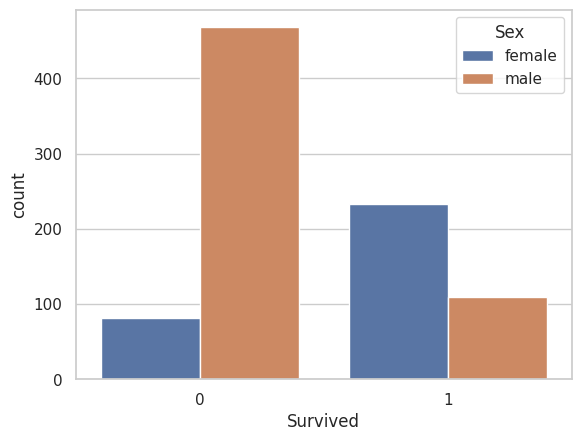

In [210]:
sns.countplot(x=df['Survived'], hue = df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis=1)

###**Survival with Embarked**

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


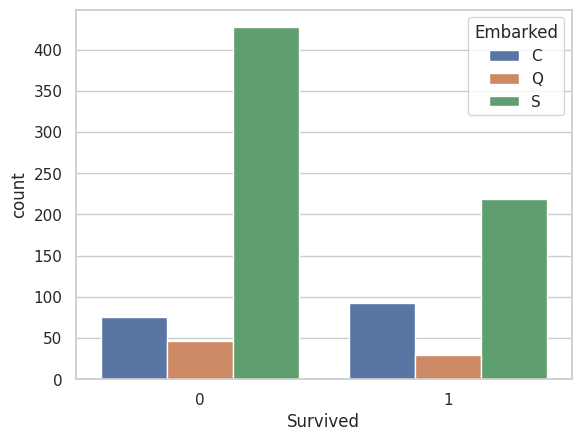

In [211]:
sns.countplot(x=df['Survived'], hue = df['Embarked'])
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis=1)

###**Survival with Age**

<ipython-input-212-56121c2afc15>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 1]['Age'], hist=True, kde_kws={"label": "Survived"}, color='g')
<ipython-input-212-56121c2afc15>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 0]['Age'], hist=True, kde_

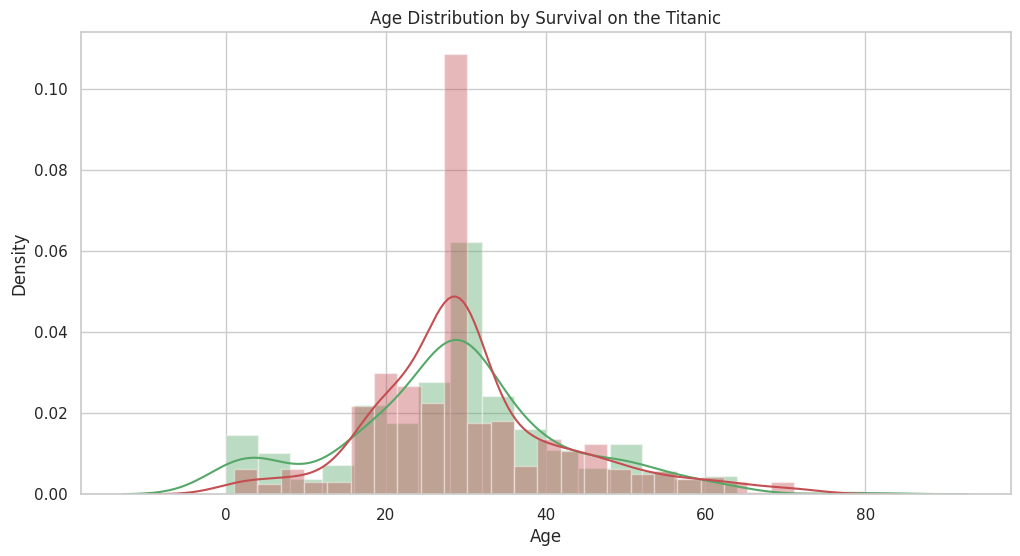

In [212]:
sns.set(style="whitegrid")

# Create a distplot to visualize the age distribution by survival
plt.figure(figsize=(12, 6))
sns.distplot(df[df['Survived'] == 1]['Age'], hist=True, kde_kws={"label": "Survived"}, color='g')
sns.distplot(df[df['Survived'] == 0]['Age'], hist=True, kde_kws={"label": "Not Survived"}, color='r')

# Customize the plot
plt.title("Age Distribution by Survival on the Titanic")
plt.xlabel("Age")
plt.ylabel("Density")

# Show the plot
plt.show()

###**Survival with Fare**

<ipython-input-213-a656840fa21b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 1]['Fare'], hist=True, kde_kws={"label": "Survived"}, color='g')
<ipython-input-213-a656840fa21b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 0]['Fare'], hist=True, kd

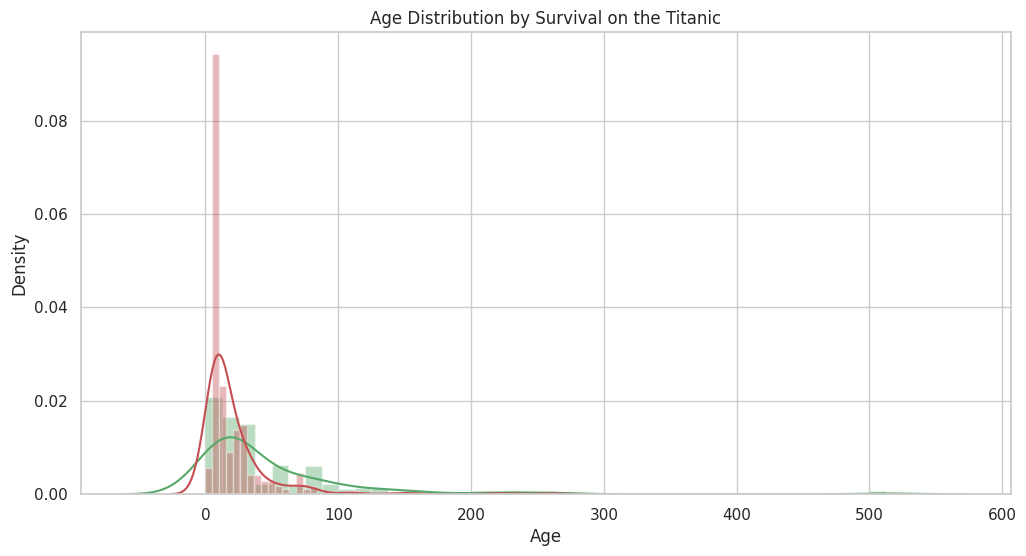

In [213]:
sns.set(style="whitegrid")

# Create a distplot to visualize the age distribution by survival
plt.figure(figsize=(12, 6))
sns.distplot(df[df['Survived'] == 1]['Fare'], hist=True, kde_kws={"label": "Survived"}, color='g')
sns.distplot(df[df['Survived'] == 0]['Fare'], hist=True, kde_kws={"label": "Not Survived"}, color='r')

# Customize the plot
plt.title("Age Distribution by Survival on the Titanic")
plt.xlabel("Age")
plt.ylabel("Density")

# Show the plot
plt.show()

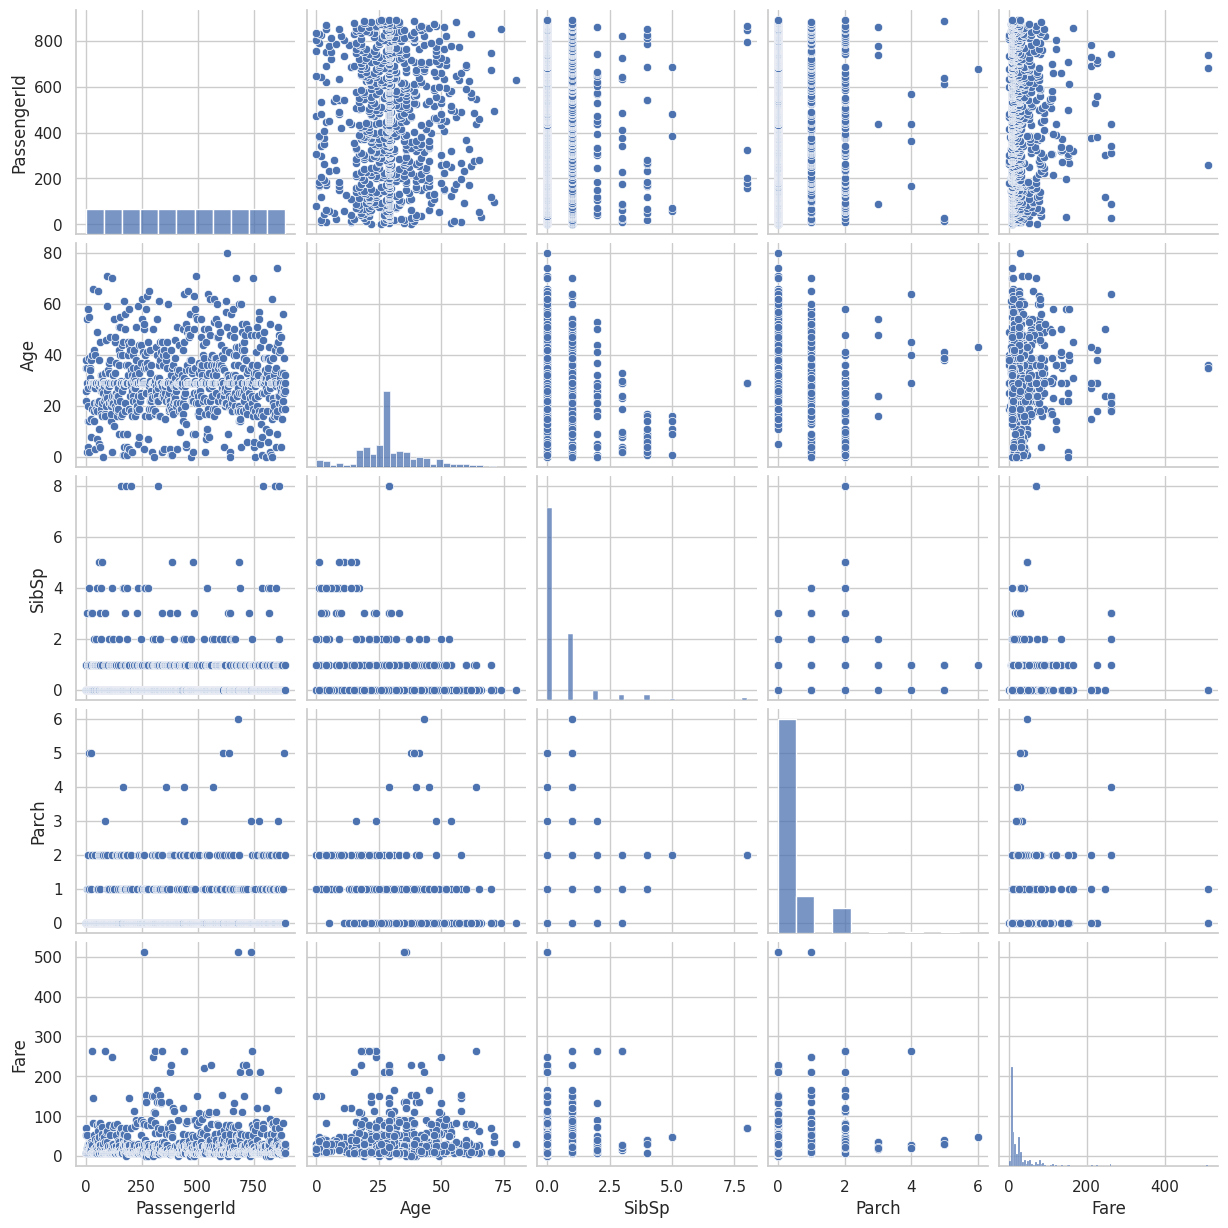

In [214]:
sns.pairplot(df)

<ipython-input-215-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

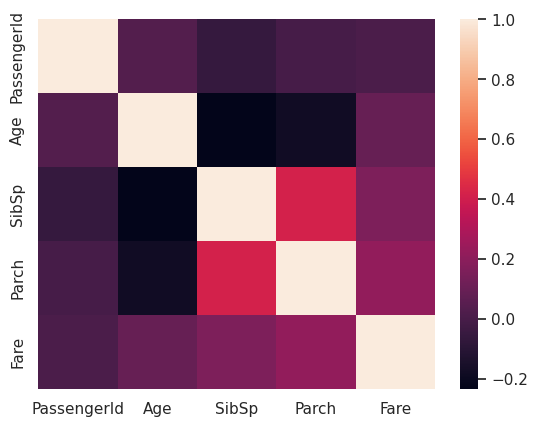

In [215]:
sns.heatmap(df.corr())